In [ ]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [ ]:
local_zip = '/content/drive/MyDrive/Colab Notebooks/Ringgit malaysia.zip'


In [ ]:
zip_ref = zipfile.ZipFile(local_zip, 'r')


In [ ]:
zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_ref.close()

In [ ]:
train_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/Ringgit malaysia')
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range= 20,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   fill_mode = 'nearest',
                                   validation_split = 0.1)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 8,
    class_mode = 'categorical',
    subset = 'training'
)

Found 374 images belonging to 3 classes.


In [ ]:
#proses penentuan data validation oleh python
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 40 images belonging to 3 classes.


In [ ]:
#Import tensorflow (membuat dan melatih deep learning model)
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
from tensorflow.python.ops.gen_array_ops import Shape

In [ ]:
#proses mengklasifikasi gambar menggunakan keras tensorflow
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape =(150,150, 3)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation='relu'),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(256,activation='relu'),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(3,activation='softmax')#for multiclass
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
#Menemukan accuracy dari data training
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs =50,
                    verbose=2)

Epoch 1/50
47/47 - 106s - loss: 1.1078 - accuracy: 0.3610 - val_loss: 1.0386 - val_accuracy: 0.5000 - 106s/epoch - 2s/step
Epoch 2/50
47/47 - 91s - loss: 0.8105 - accuracy: 0.5856 - val_loss: 0.5316 - val_accuracy: 0.6750 - 91s/epoch - 2s/step
Epoch 3/50
47/47 - 91s - loss: 0.6329 - accuracy: 0.6791 - val_loss: 0.5454 - val_accuracy: 0.7500 - 91s/epoch - 2s/step
Epoch 4/50
47/47 - 86s - loss: 0.5026 - accuracy: 0.7273 - val_loss: 0.4751 - val_accuracy: 0.7250 - 86s/epoch - 2s/step
Epoch 5/50
47/47 - 90s - loss: 0.4521 - accuracy: 0.7727 - val_loss: 0.4883 - val_accuracy: 0.6500 - 90s/epoch - 2s/step
Epoch 6/50
47/47 - 89s - loss: 0.4409 - accuracy: 0.8075 - val_loss: 0.4998 - val_accuracy: 0.7000 - 89s/epoch - 2s/step
Epoch 7/50
47/47 - 87s - loss: 0.4157 - accuracy: 0.8289 - val_loss: 0.3734 - val_accuracy: 0.8500 - 87s/epoch - 2s/step
Epoch 8/50
47/47 - 90s - loss: 0.3600 - accuracy: 0.8476 - val_loss: 0.4658 - val_accuracy: 0.7750 - 90s/epoch - 2s/step
Epoch 9/50
47/47 - 86s - loss:

In [ ]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


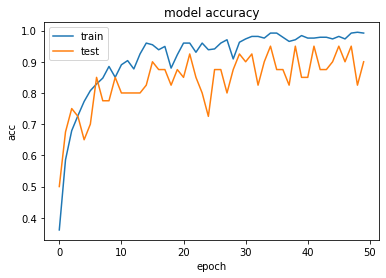

In [ ]:
print(history.history.keys())
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt


<ipython-input-20-afe1ae76a4d7>:5: MatplotlibDeprecationWarning: Unrecognized location 'lower right '. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc= 'lower right ')


Text(0.5, 1.0, 'Training and Validation Loss')

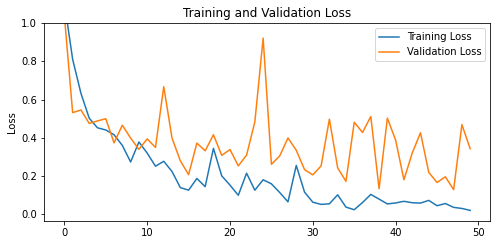

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss , label = 'Validation Loss')
plt.legend(loc= 'lower right ')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()), 1])
plt.title ('Training and Validation Loss')

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print ('Test accuracy : ', accuracy)


3/3 [==============================] - 1s 331ms/step - loss: 0.5303 - accuracy: 0.9000
Test accuracy :  0.8999999761581421


In [ ]:
model.save("DatasetRinggitMalaysia.h5")